In [1]:
import neuron
from neuron import h,rxd,gui2
print(neuron.__version__)


from neuron import h,rxd, gui
from neuron.units import ms, mV
import textwrap

7.7.2


#Step 2: Create a cell 

##Aside 1: NEURON's h.topology function
NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.


load library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load('data_downsampled_from_19513019.npy')

(20001, 2)


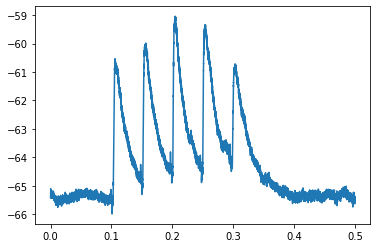

In [3]:
print(image.shape)
x = image[:,0]
y = image[:,1]
plt.plot(x,y)
plt.show()

# Our model

In [4]:
h.load_file('stdrun.hoc')


1.0

In [5]:
soma = h.Section(name='soma')
soma.L = 20
soma.diam = 20
soma.insert('hh')
dendrite = h.Section(name='dendrite')
dendrite.L = 500
dendrite.diam = 0.5
dendrite.nseg = 10
dendrite.insert('pas') #hh
dendrite_1 = h.Section(name='dendrite_1')
dendrite_1.L = 100
dendrite_1.diam = 0.5
dendrite_1.nseg = 10
dendrite_1.insert('pas')
dendrite_2 = h.Section(name='dendrite_2')
dendrite_2.L = 100
dendrite_2.diam = 0.5
dendrite_2.nseg = 10
dendrite_2.insert('pas');

Connection

In [6]:
dendrite.connect(soma,1,0)
dendrite_1.connect(dendrite,1,1)
dendrite_2.connect(dendrite,1,1);

In [7]:
h.topology()


|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)



1.0

## Insert an alpha synaspe

Alpha synaspe 

In [8]:
h.load_file('stdrun.hoc')

s = h.NetStim()
x = x* 1000


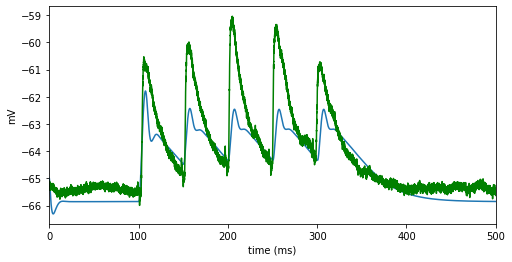

[-65.4296875  -65.35339355 -65.36865234 ... -65.50598145 -65.54412842
 -65.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [9]:
asyn = h.Exp2Syn(dendrite(0.5))
asyn.tau1 = 10
asyn.tau2 = 25
asyn.e = 0
asyn.i = 0
s.interval =50
s.number= 5
s.noise=0
s.start=0


stim = h.NetCon(s,asyn)
stim.delay=100

stim.weight[0] = 0.0055



h.finitialize(-65 * mV)

v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)

plt.xlabel('time (ms)')
plt.xlim(0,500)
plt.ylabel('mV')
plt.plot(x,y,color='g')
plt.show()
print(y)
print(x)

In [10]:
x1 = image[1000:,0]
y1 = image[1000:,1]
print(x1)
print(y1)

[0.025    0.025025 0.02505  ... 0.49995  0.499975 0.5     ]
[-65.4296875  -65.35339355 -65.44494629 ... -65.50598145 -65.54412842
 -65.62805176]


In [13]:
1/0.00001

99999.99999999999

In [14]:
print(t_vec[1])

0.025


In [16]:
x1 = h.Vector(image[:,1])
print(x1)


Vector[6]


In [11]:
tau1 = range(1,20)
tau2 = range(1,20)
x0 = h.Vector(image[:,0])
x1 = h.Vector(image[:,1])
#for x in x1: print(x)

print((x1[100]))
#for y in v_vec : print(y)
print((v_vec[100]))


-65.3381347656238
-66.1063671025274


In [12]:
test = x0
test2 = v_vec


newvec = test.append(v_vec)


40002


In [19]:

print(len(x1))
print(len(test2))
print(len(newvec))
print(x0.size)
print(v_vec.size)


print(newvec.resize(20001))

20001
20001
40002
Vector[5].size()
Vector[3].size()
Vector[5]


In [25]:

tau1 = range(1,2)

for x in tau1 : 
    def efun(v):
        asyn.tau1 = x
        asyn.tau2 = 10
        stim.weight[0] = 0.001
        v_vec = h.Vector()             # Membrane potential vector
        t_vec = h.Vector()             # Time stamp vector
        v_vec.record(soma(0.5)._ref_v)
        t_vec.record(h._ref_t)
        h.tstop = 500
        h.run()
        return (2 + v_vec ) ** 2 + (3 - x1) ** 2 
    h.attr_praxis(1e-5, 0.5, 0)
    e = h.fit_praxis(efun, v_vec)
    print("e=%g x=%g y=%g\n"%(e, v_vec, x1))
    

TypeError: unsupported operand type(s) for ** or pow(): 'hoc.HocObject' and 'int'

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

TypeError: bad argument type for built-in operation

SystemError: <method 'decode' of 'bytes' objects> returned a result with an error set

 near line 0
 ^
        fit_praxis(..., ...)


RuntimeError: hoc error

In [ ]:
v = h.Vector([0, 0])
print(v[0])
print(v[1])
def efun(v):
  return (2 + v_vec[0] ) ** 2 + (3 - v_vec[1]) ** 2  
h.attr_praxis(1e-5, 0.5, 0)
e = h.fit_praxis(efun, v)
print("e=%g x=%g y=%g\n"%(e, v_vec[0], v_vec[1]))


In [ ]:
import numpy as np
c = np.linspace(0.1,1,10)
v = h.Vector([0, 0])

for a in c:
    for i in range(10):
        asyn = h.Exp2Syn(a,sec = dendrite)
        asyn.tau1 = 10
        asyn.tau2 = 10
        s.interval =80
        s.number=5
        s.noise=0
        s.start=100
        stim = h.NetCon(s,asyn)
        h.finitialize(-70 * mV)
        stim.weight[0] = 0.1
        v_vec = h.Vector()             # Membrane potential vector
        t_vec = h.Vector()             # Time stamp vector
        v_vec.record(soma(0.5)._ref_v)
        t_vec.record(h._ref_t)

        h.tstop = 500
        h.run()
        
       
        ax=plt.subplot(5, 2, i+1)
        ax.plot(t_vec,v_vec)
    
ax.set_xlabel('time (ms)')
ax.set_ylabel('mV')
plt.savefig('test.jpg')
plt.show()

In [ ]:
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

In [ ]:
h.tstop = 500
h.run()

In [ ]:
for i in range(0,len(c)):
    ax=plt.subplot(5, 2, i+1)
    ax.plot(t_vec,v_vec)
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('mV')


plt.show()

In [ ]:

plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.xlim(0,500)
plt.ylabel('mV')
plt.show()

In [ ]:
x1 = image[1000:,0]
y1 = image[1000:,1]

In [31]:
v = h.Vector([0, 0])
def efun(v):
  return (2 + v[0] ) ** 2 + (3 - v[1]) ** 2  
h.attr_praxis(1e-5, 0.5, 0)
e = h.fit_praxis(efun, v)
print("e=%g x=%g y=%g\n"%(e, v[0], v[1]))


e=0 x=-2 y=3



In [11]:
v = h.Vector([0, 0])
for y in v : (print(y))


0.0
0.0
